In [1]:
using Pkg, CairoMakie, LaTeXStrings, LinearAlgebra
Pkg.activate("/Users/jiyong/.juliaenv/image")
using OpenCV, TestImages
include("cvext.jl")

  Activating project at `~/.juliaenv/image`


cvSize (generic function with 1 method)

In [2]:
img0= img2mat(testimage("cameraman.tif"));

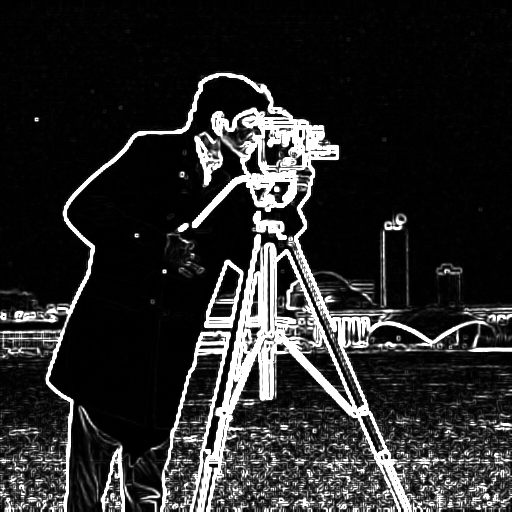

In [23]:
imgx = cv.Mat(convert.(Float32, img0))
imgx_sq = cv.Mat(imgx .* imgx)
imgx_mu = cv.blur(imgx, cvSize(3, 3))
imgx_sqmu = cv.blur(imgx_sq, cvSize(3, 3))
imgx_musq = cv.Mat(imgx_mu .* imgx_mu)
img_sdfiltered = cv.Mat(imgx_sqmu .- imgx_musq)

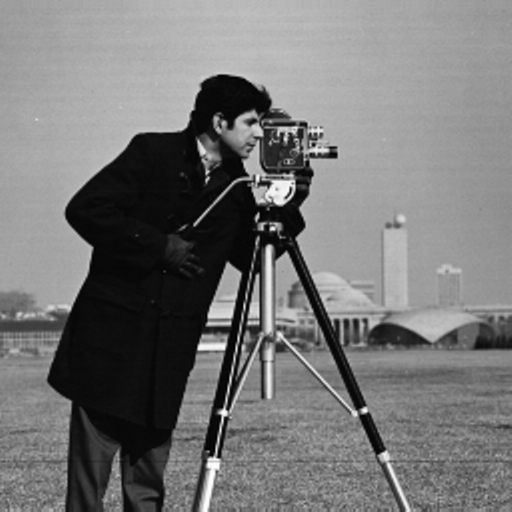

In [25]:
img0

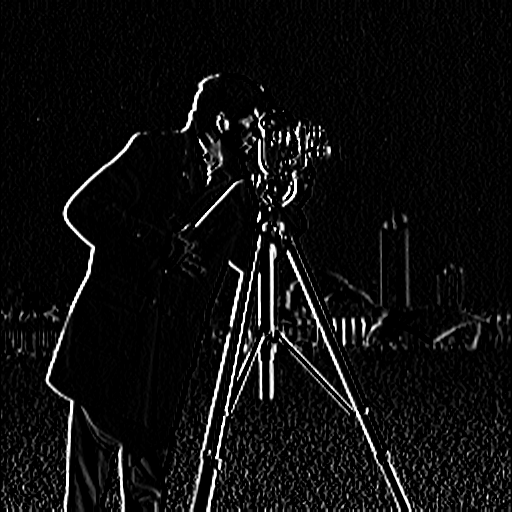

In [38]:
K1 = arr2mat(Int32[1 0 -1; 2 0 -2; 1 0 -1])
cv.filter2D(img0, -1, K1)


In [ ]:
F2 = arr2mat(Int32.([1 0 -1; 2 0 -2; 1 0 -1]))

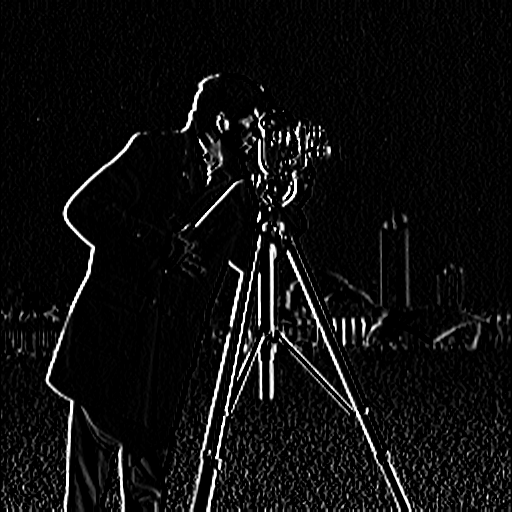

In [21]:
std(imgx[1, 100:102, 100:102])

1.6414763002993509

In [22]:
img_sdfiltered[1, 101, 101]

-75